In [1]:
import pandas as pd
import numpy as np
import string
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import os
from os import path
from wordcloud import WordCloud

from nltk import word_tokenize
from nltk.corpus import stopwords

from nltk import bigrams, trigrams

In [2]:
fake = pd.read_csv('data/Fake.csv')

In [3]:
true = pd.read_csv('data/True.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [79]:
fake['date'] = fake['date'].str.strip()
# fake['date'] = fake['date'].str.lstrip()

In [82]:
true['date'] = true['date'].str.strip()
# true['date'] = true['date'].str.lstrip()

In [72]:
date_length_list = pd.Series(fake['date']).map(lambda x: len(x)) 

incorrect_date_index = [True if l != 17 else False for l in date_length_list]

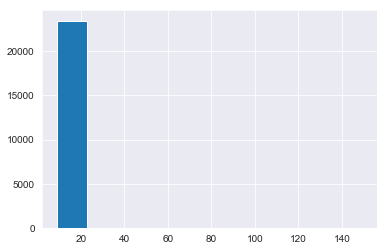

In [73]:
plt.hist(date_length_list)
plt.show()

In [74]:
fake[np.array(incorrect_date_index).reshape(-1,1)]

,title,text,subject,date,label
28,Liberal Group Trolls Trump At Roy Moore Rally...,Donald Trump held a rally for Alabama Senate c...,News,"December 9, 2017",1
29,Don Jr. Tries To Mock Al Franken’s Resignatio...,When Sen. Al Franken (D-MN) announced his plan...,News,"December 7, 2017",1
30,"BREAKING: Cop Finally Gets His Due, Walter Sc...","In America, we have been having a conversation...",News,"December 7, 2017",1
31,Watch: Is This Proof Trump Is Unfit for Service?,New questions are being asked about President ...,News,"December 7, 2017",1
32,Trump Completely SCREWS The Middle East Peace...,"On Wednesday, Donald Trump took a step no prev...",News,"December 6, 2017",1
33,Trump Only Cares About Trump; Why He Is Recog...,President Donald Trump announced yesterday tha...,News,"December 6, 2017",1
34,Watch: Trump Supporting Coal CEO Upset Trump ...,"While on the campaign trail, Donald Trump prom...",News,"December 6, 2017",1
35,"Sitting GOP Senator Has Had ENOUGH, Donates T...",Arizona Republican Senator Jeff Flake has neve...,News,"December 5, 2017",1
36,Republican National Committee: Better A Pedop...,"By now, the whole world knows that Alabama Sen...",News,"December 5, 2017",1
37,Donald Trump’s Eating Habits Could Be Dramati...,We ve all heard the stories of Donald Trump pr...,News,"December 5, 2017",1


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
print(len(fake))
print(len(true))

23481
21417


In [7]:
def check_null(df):
    for col in df.columns:
        print(col)
        print(df[col].isnull().sum())
        print('=====')

In [8]:
check_null(fake)

title
0
=====
text
0
=====
subject
0
=====
date
0
=====


In [9]:
check_null(true)

title
0
=====
text
0
=====
subject
0
=====
date
0
=====


In [10]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
true.isna().sum() / len(true)

title      0.0
text       0.0
subject    0.0
date       0.0
dtype: float64

In [12]:
fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [14]:
df1.head()

,title,text,date
subject,,,
Government News,1570,1570,1570
Middle-east,778,778,778
News,9050,9050,9050
US_News,783,783,783
left-news,4459,4459,4459


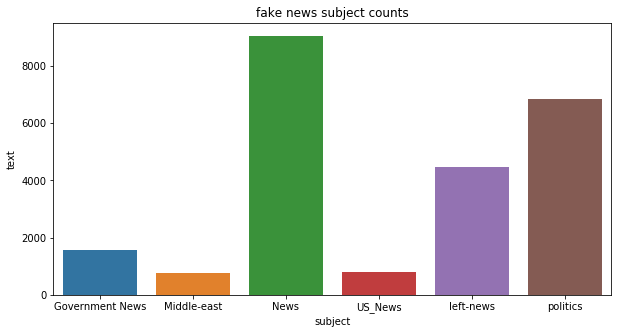

In [23]:
df1 = fake.groupby(['subject']).count()

plt.figure(figsize=(10,5))

sns.barplot(df1.index, df1['text'])

plt.title('fake news subject counts')

plt.show()

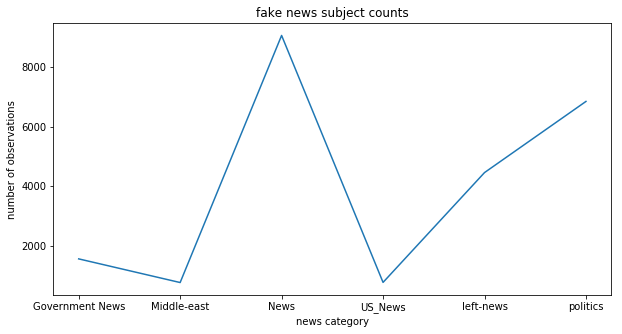

In [26]:
df1 = fake.groupby(['subject']).count()

plt.figure(figsize=(10,5))

sns.lineplot(df1.index, df1['text'])

plt.ylabel('number of observations')
plt.xlabel('news category')
plt.title('fake news subject counts')
plt.show()

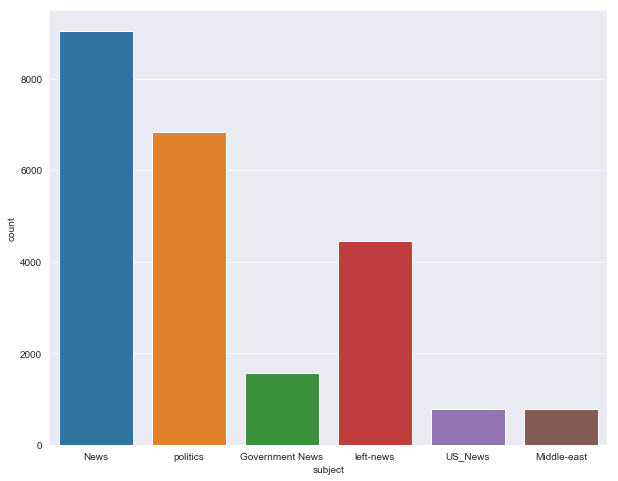

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
sns.countplot(fake['subject'])
plt.show()

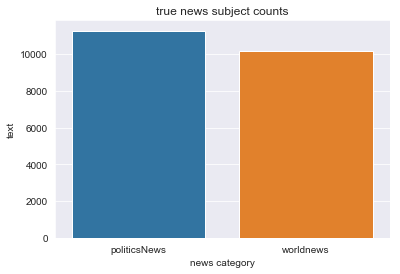

In [32]:
df2 = true.groupby(['subject']).count()

sns.barplot(df2.index, df2['text'])

plt.title('true news subject counts')
plt.xlabel('news category')

plt.show()

In [13]:
fake['date'].unique()

array(['December 31, 2017', 'December 30, 2017', 'December 29, 2017', ...,
       'December 18, 2017', 'December 14, 2017', 'December 8, 2017'],
      dtype=object)

In [14]:
true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

(-0.5, 399.5, 199.5, -0.5)

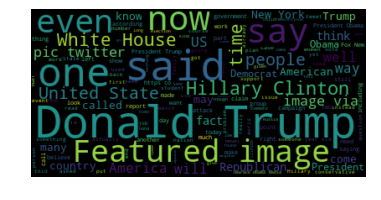

In [83]:
# showing word cloud for fake data

wordcloud = WordCloud().generate(''.join(fake['text']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [105]:
stop_words = stopwords.words('english')

fake_corpus = ''.join(fake['text'])

fake_corpus_word = [word.lower() for word in word_tokenize(fake_corpus) if word not in stop_words and word.isalpha()]

fake_word_counter = Counter(fake_corpus_word)

In [107]:
fake_word_counter.most_common(10)

[('trump', 74030),
 ('i', 43558),
 ('the', 43421),
 ('said', 31121),
 ('people', 25993),
 ('president', 25558),
 ('would', 23457),
 ('one', 22878),
 ('clinton', 18068),
 ('obama', 17864)]

In [138]:
trigram_word = list(trigrams(fake_corpus_word, pad_left = True, pad_right = True))


In [139]:
tri_common_counter = Counter(trigram_word).most_common(10)

In [140]:
tri_common_counter

[(('featured', 'image', 'via'), 1711),
 (('donald', 'trump', 'realdonaldtrump'), 1692),
 (('new', 'york', 'times'), 1502),
 (('black', 'lives', 'matter'), 1240),
 (('at', 'century', 'wire'), 985),
 (('president', 'donald', 'trump'), 953),
 (('news', 'at', 'century'), 923),
 (('president', 'united', 'states'), 893),
 (('president', 'barack', 'obama'), 856),
 (('image', 'via', 'video'), 786)]

In [147]:
tri_common_counter[0][0]

('featured', 'image', 'via')

In [157]:
for element in tri_common_counter:
    print(' '.join(element[0]))

featured image via
donald trump realdonaldtrump
new york times
black lives matter
at century wire
president donald trump
news at century
president united states
president barack obama
image via video


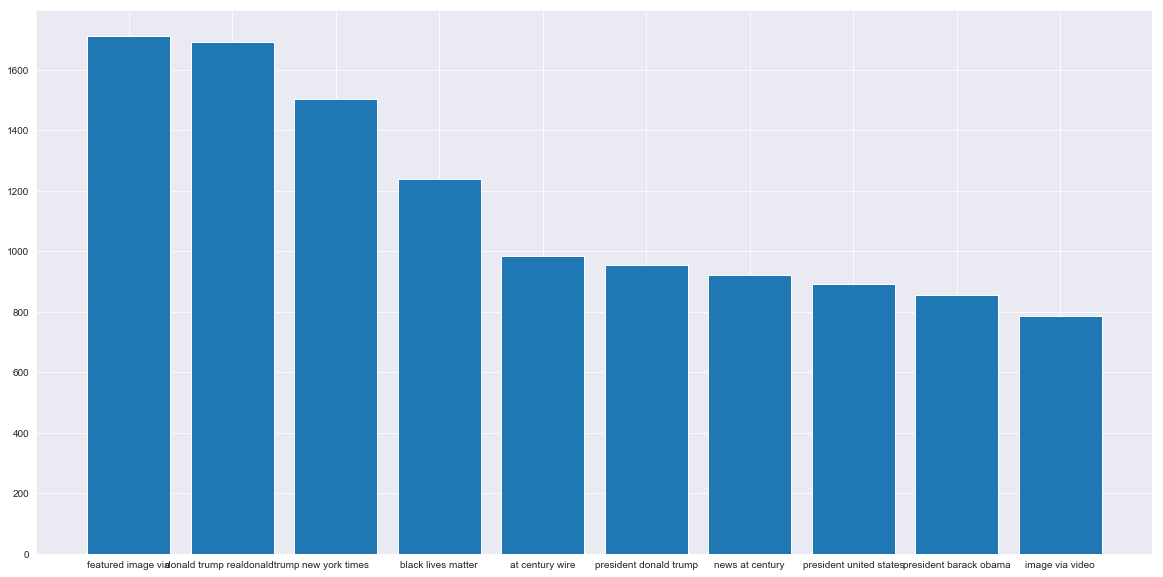

In [165]:

x = [' '.join(e[0]) for e in tri_common_counter]

y = np.array([e[1] for e in tri_common_counter])

plt.figure(figsize=(20,10))
plt.bar(x, y)
plt.show()

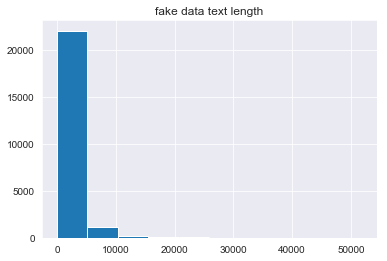

In [33]:
# text length

plt.hist(fake['text'].str.len())
plt.title('fake data text length')
plt.show()


In [53]:
type(fake['text'].str.split(' '))

pandas.core.series.Series

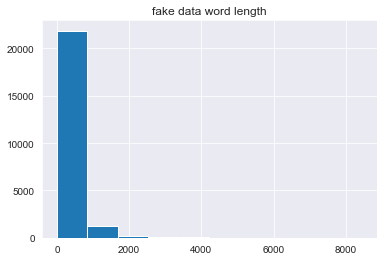

In [90]:
# text length

plt.hist(fake['text'].str.split(' ').map(lambda x: len(x)))
plt.title('fake data word length')
plt.show()

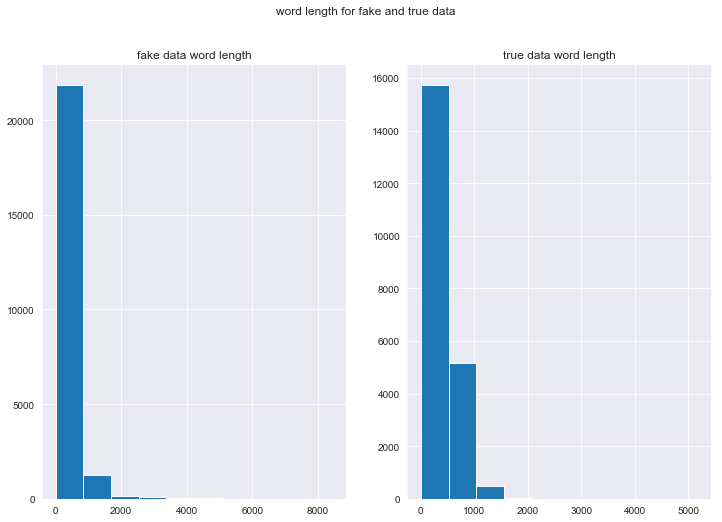

In [98]:
# text length
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(12,8))

ax1.hist(fake['text'].str.split(' ').map(lambda x: len(x)))
ax1.set_title('fake data word length')


ax2.hist(true['text'].str.split(' ').map(lambda x: len(x)))
ax2.set_title('true data word length')

fig.suptitle('word length for fake and true data')
plt.show()

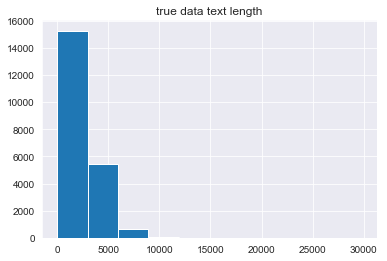

In [88]:
# text length

plt.hist(true['text'].str.len())
plt.title('true data text length')
plt.show()

In [34]:
fake['label'] = 1
true['label'] = 0

In [39]:
df = pd.concat([fake, true])

In [40]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


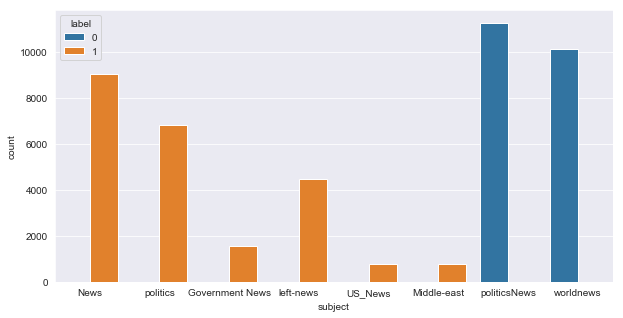

In [45]:
plt.figure(figsize= (10,5))
sns.countplot(x = df['subject'], hue = df['label'])
plt.show()

In [36]:
df = df[['title', 'text', 'label']]

In [37]:
df['total_text'] = df['title'] + df['text']

In [48]:
df = df[['total_text', 'label']]

In [49]:
df.head()

,total_text,label
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


In [50]:

df_train, df_validation = train_test_split(df, test_size = 0.2, random_state = 1)

X_train, y_train = df_train['total_text'], df_train['label']

X_validation, y_validation = df_validation['total_text'], df_validation['label']

In [51]:
X_train.head()

19625    FLASHBACK 2015: ANTI-GUN OBSESSED White House ...
21965    ‘Man Bites Dog’: New York Times Does Some Actu...
12561    Putin, Egypt's Sisi discuss restart of flights...
4137     Trump greets Egyptian-American freed from Egyp...
1608     Senator McCain to vote against Obamacare repea...
Name: total_text, dtype: object

In [60]:
# tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(X_train)

X_train_vectorized = tfidf_vectorizer.transform(X_train)

X_validation_vectorized = tfidf_vectorizer.transform(X_validation)

In [56]:
y_train = np.array(y_train).reshape(-1,1).ravel()

y_validation = np.array(y_validation).reshape(-1,1).ravel()

In [57]:
def model_training(classifier, X_train_vectorized, y_train, X_validation_vectorized, y_validation):
    model = classifier
    model.fit(X_train_vectorized, y_train)
    y_validation_pred = model.predict(X_validation_vectorized)
    classification = classification_report(y_validation_pred, y_validation)
    print(classification)
    return model

In [61]:
model_training(LogisticRegression(), X_train_vectorized, y_train, X_validation_vectorized, y_validation)

/Users/lin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4317
           1       0.99      0.99      0.99      4663

   micro avg       0.99      0.99      0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
model_training(RandomForestClassifier(), X_train_vectorized, y_train, X_validation_vectorized, y_validation)

/Users/lin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4360
           1       0.96      0.98      0.97      4620

   micro avg       0.97      0.97      0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)